In [1]:
import pandas as pd
import numpy as np

### Object creation

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.469658,-1.192814,-1.149041,-0.574876
2013-01-02,0.821901,1.181740,0.031508,1.952763
2013-01-03,-0.022915,-0.004985,1.173478,0.664350
2013-01-04,0.850941,-0.875429,2.314987,-0.746071
2013-01-05,-0.768413,-1.582083,0.841573,0.134712
2013-01-06,-1.004684,-0.334128,0.070038,-0.322639


In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [7]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


### Viewing Data

In [8]:
df.head()

,A,B,C,D
2013-01-01,0.469658,-1.192814,-1.149041,-0.574876
2013-01-02,0.821901,1.181740,0.031508,1.952763
2013-01-03,-0.022915,-0.004985,1.173478,0.664350
2013-01-04,0.850941,-0.875429,2.314987,-0.746071
2013-01-05,-0.768413,-1.582083,0.841573,0.134712


In [9]:
df.tail(2)

,A,B,C,D
2013-01-05,-0.768413,-1.582083,0.841573,0.134712
2013-01-06,-1.004684,-0.334128,0.070038,-0.322639


In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.to_numpy()

array([[ 0.46965824, -1.19281421, -1.14904136, -0.57487574],
       [ 0.82190106,  1.18174034,  0.03150782,  1.95276349],
       [-0.0229147 , -0.00498493,  1.17347756,  0.6643496 ],
       [ 0.85094118, -0.87542915,  2.31498679, -0.74607063],
       [-0.76841293, -1.58208282,  0.84157329,  0.13471224],
       [-1.00468398, -0.33412793,  0.07003776, -0.32263865]])

In [13]:
df2.to_numpy() # expensive

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.057748,-0.467950,0.547090,0.184707
std,0.800071,0.988583,1.181085,1.005912
min,-1.004684,-1.582083,-1.149041,-0.746071
25%,-0.582038,-1.113468,0.041140,-0.511816
50%,0.223372,-0.604779,0.455806,-0.093963
75%,0.733840,-0.087271,1.090501,0.531940
max,0.850941,1.181740,2.314987,1.952763


In [15]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.469658,0.821901,-0.022915,0.850941,-0.768413,-1.004684
B,-1.192814,1.181740,-0.004985,-0.875429,-1.582083,-0.334128
C,-1.149041,0.031508,1.173478,2.314987,0.841573,0.070038
D,-0.574876,1.952763,0.664350,-0.746071,0.134712,-0.322639


In [16]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.574876,-1.149041,-1.192814,0.469658
2013-01-02,1.952763,0.031508,1.181740,0.821901
2013-01-03,0.664350,1.173478,-0.004985,-0.022915
2013-01-04,-0.746071,2.314987,-0.875429,0.850941
2013-01-05,0.134712,0.841573,-1.582083,-0.768413
2013-01-06,-0.322639,0.070038,-0.334128,-1.004684


In [17]:
df.sort_values(by="C", ascending=False)

,A,B,C,D
2013-01-04,0.850941,-0.875429,2.314987,-0.746071
2013-01-03,-0.022915,-0.004985,1.173478,0.664350
2013-01-05,-0.768413,-1.582083,0.841573,0.134712
2013-01-06,-1.004684,-0.334128,0.070038,-0.322639
2013-01-02,0.821901,1.181740,0.031508,1.952763
2013-01-01,0.469658,-1.192814,-1.149041,-0.574876


### Selection

#### Getting

In [18]:
df["A"]

2013-01-01    0.469658
2013-01-02    0.821901
2013-01-03   -0.022915
2013-01-04    0.850941
2013-01-05   -0.768413
2013-01-06   -1.004684
Freq: D, Name: A, dtype: float64

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,0.469658,-1.192814,-1.149041,-0.574876
2013-01-02,0.821901,1.181740,0.031508,1.952763
2013-01-03,-0.022915,-0.004985,1.173478,0.664350


In [20]:
df

,A,B,C,D
2013-01-01,0.469658,-1.192814,-1.149041,-0.574876
2013-01-02,0.821901,1.181740,0.031508,1.952763
2013-01-03,-0.022915,-0.004985,1.173478,0.664350
2013-01-04,0.850941,-0.875429,2.314987,-0.746071
2013-01-05,-0.768413,-1.582083,0.841573,0.134712
2013-01-06,-1.004684,-0.334128,0.070038,-0.322639


In [21]:
df["20130102":"20130103"]

,A,B,C,D
2013-01-02,0.821901,1.181740,0.031508,1.952763
2013-01-03,-0.022915,-0.004985,1.173478,0.664350


#### Selection by label

In [22]:
df.loc[dates[0]]

A    0.469658
B   -1.192814
C   -1.149041
D   -0.574876
Name: 2013-01-01 00:00:00, dtype: float64

In [23]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [24]:
df.loc[:df.index[2], ["A", "B"]]

,A,B
2013-01-01,0.469658,-1.192814
2013-01-02,0.821901,1.181740
2013-01-03,-0.022915,-0.004985


In [25]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.821901,1.181740
2013-01-03,-0.022915,-0.004985
2013-01-04,0.850941,-0.875429


In [26]:
df.loc["20130102", ["A", "B"]]

A    0.821901
B    1.181740
Name: 2013-01-02 00:00:00, dtype: float64

In [27]:
df.loc[dates[0], "A"]

0.4696582375421624

In [28]:
df.at[dates[0], "A"]

0.4696582375421624

#### Selection by position

In [29]:
df.iloc[3]

A    0.850941
B   -0.875429
C    2.314987
D   -0.746071
Name: 2013-01-04 00:00:00, dtype: float64

In [30]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.850941,-0.875429
2013-01-05,-0.768413,-1.582083


In [31]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.821901,0.031508
2013-01-03,-0.022915,1.173478
2013-01-05,-0.768413,0.841573


In [32]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.821901,1.181740,0.031508,1.952763
2013-01-03,-0.022915,-0.004985,1.173478,0.664350


In [33]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.192814,-1.149041
2013-01-02,1.181740,0.031508
2013-01-03,-0.004985,1.173478
2013-01-04,-0.875429,2.314987
2013-01-05,-1.582083,0.841573
2013-01-06,-0.334128,0.070038


In [34]:
df.iloc[1, 1]

1.1817403400509783

In [35]:

df.iat[1, 1]

1.1817403400509783

In [36]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.469658,-1.192814,-1.149041,-0.574876
2013-01-02,0.821901,1.181740,0.031508,1.952763
2013-01-04,0.850941,-0.875429,2.314987,-0.746071


In [37]:
df[df > 0]

,A,B,C,D
2013-01-01,0.469658,NaN,NaN,NaN
2013-01-02,0.821901,1.18174,0.031508,1.952763
2013-01-03,NaN,NaN,1.173478,0.664350
2013-01-04,0.850941,NaN,2.314987,NaN
2013-01-05,NaN,NaN,0.841573,0.134712
2013-01-06,NaN,NaN,0.070038,NaN


In [38]:
df

,A,B,C,D
2013-01-01,0.469658,-1.192814,-1.149041,-0.574876
2013-01-02,0.821901,1.181740,0.031508,1.952763
2013-01-03,-0.022915,-0.004985,1.173478,0.664350
2013-01-04,0.850941,-0.875429,2.314987,-0.746071
2013-01-05,-0.768413,-1.582083,0.841573,0.134712
2013-01-06,-1.004684,-0.334128,0.070038,-0.322639


In [39]:
df3 = df.copy()
df3["E"] = ["one", "one", "two", "three", "four", "three"]
df3

,A,B,C,D,E
2013-01-01,0.469658,-1.192814,-1.149041,-0.574876,one
2013-01-02,0.821901,1.181740,0.031508,1.952763,one
2013-01-03,-0.022915,-0.004985,1.173478,0.664350,two
2013-01-04,0.850941,-0.875429,2.314987,-0.746071,three
2013-01-05,-0.768413,-1.582083,0.841573,0.134712,four
2013-01-06,-1.004684,-0.334128,0.070038,-0.322639,three


In [40]:
df3[df3['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.022915,-0.004985,1.173478,0.664350,two
2013-01-05,-0.768413,-1.582083,0.841573,0.134712,four


#### Setting

In [41]:
s1 = pd.Series([1, 2, 3, 4, 5, 6, 7], index=pd.date_range("20130102", periods=7))

In [42]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
2013-01-08    7
Freq: D, dtype: int64

In [43]:
df.at[dates[0], "A"] = 0

In [44]:
df

,A,B,C,D
2013-01-01,0.000000,-1.192814,-1.149041,-0.574876
2013-01-02,0.821901,1.181740,0.031508,1.952763
2013-01-03,-0.022915,-0.004985,1.173478,0.664350
2013-01-04,0.850941,-0.875429,2.314987,-0.746071
2013-01-05,-0.768413,-1.582083,0.841573,0.134712
2013-01-06,-1.004684,-0.334128,0.070038,-0.322639


In [45]:
df.iat[0, 1] = 0

In [46]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.149041,-0.574876
2013-01-02,0.821901,1.181740,0.031508,1.952763
2013-01-03,-0.022915,-0.004985,1.173478,0.664350
2013-01-04,0.850941,-0.875429,2.314987,-0.746071
2013-01-05,-0.768413,-1.582083,0.841573,0.134712
2013-01-06,-1.004684,-0.334128,0.070038,-0.322639


In [47]:
df.loc[:, "D"] = np.array([5] * len(df))

In [48]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.149041,5
2013-01-02,0.821901,1.181740,0.031508,5
2013-01-03,-0.022915,-0.004985,1.173478,5
2013-01-04,0.850941,-0.875429,2.314987,5
2013-01-05,-0.768413,-1.582083,0.841573,5
2013-01-06,-1.004684,-0.334128,0.070038,5


In [49]:
len(df)

6

In [50]:
df.shape

(6, 4)

In [51]:
df3

,A,B,C,D,E
2013-01-01,0.469658,-1.192814,-1.149041,-0.574876,one
2013-01-02,0.821901,1.181740,0.031508,1.952763,one
2013-01-03,-0.022915,-0.004985,1.173478,0.664350,two
2013-01-04,0.850941,-0.875429,2.314987,-0.746071,three
2013-01-05,-0.768413,-1.582083,0.841573,0.134712,four
2013-01-06,-1.004684,-0.334128,0.070038,-0.322639,three


In [52]:
df3.drop("E", axis=1, inplace=True)
df3

,A,B,C,D
2013-01-01,0.469658,-1.192814,-1.149041,-0.574876
2013-01-02,0.821901,1.181740,0.031508,1.952763
2013-01-03,-0.022915,-0.004985,1.173478,0.664350
2013-01-04,0.850941,-0.875429,2.314987,-0.746071
2013-01-05,-0.768413,-1.582083,0.841573,0.134712
2013-01-06,-1.004684,-0.334128,0.070038,-0.322639


In [53]:
df3[df3>0] = -df3
df3

,A,B,C,D
2013-01-01,-0.469658,-1.192814,-1.149041,-0.574876
2013-01-02,-0.821901,-1.181740,-0.031508,-1.952763
2013-01-03,-0.022915,-0.004985,-1.173478,-0.664350
2013-01-04,-0.850941,-0.875429,-2.314987,-0.746071
2013-01-05,-0.768413,-1.582083,-0.841573,-0.134712
2013-01-06,-1.004684,-0.334128,-0.070038,-0.322639


In [54]:
df3[df3<0]  = -df3
df3

,A,B,C,D
2013-01-01,0.469658,1.192814,1.149041,0.574876
2013-01-02,0.821901,1.181740,0.031508,1.952763
2013-01-03,0.022915,0.004985,1.173478,0.664350
2013-01-04,0.850941,0.875429,2.314987,0.746071
2013-01-05,0.768413,1.582083,0.841573,0.134712
2013-01-06,1.004684,0.334128,0.070038,0.322639


### Missing data

In [57]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1

In [58]:
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.149041,5,1.0
2013-01-02,0.821901,1.181740,0.031508,5,1.0
2013-01-03,-0.022915,-0.004985,1.173478,5,NaN
2013-01-04,0.850941,-0.875429,2.314987,5,NaN


In [59]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,0.000000,0.00000,-1.149041,5,1.0
2013-01-02,0.821901,1.18174,0.031508,5,1.0


In [62]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-1.149041,5,1.0
2013-01-02,0.821901,1.181740,0.031508,5,1.0
2013-01-03,-0.022915,-0.004985,1.173478,5,5.0
2013-01-04,0.850941,-0.875429,2.314987,5,5.0


In [63]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### Operations

#### Stats

In [64]:
df.mean()

A   -0.020528
B   -0.269147
C    0.547090
D    5.000000
dtype: float64

In [65]:
df.mean(1)

2013-01-01    0.962740
2013-01-02    1.758787
2013-01-03    1.536394
2013-01-04    1.822625
2013-01-05    0.872769
2013-01-06    0.932806
Freq: D, dtype: float64

In [71]:
df[0:1].mean(1)

2013-01-01    0.96274
Freq: D, dtype: float64

#### Apply

In [73]:
np.cumsum

<function numpy.cumsum(a, axis=None, dtype=None, out=None)>

In [74]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.149041,5
2013-01-02,0.821901,1.181740,-1.117534,10
2013-01-03,0.798986,1.176755,0.055944,15
2013-01-04,1.649928,0.301326,2.370931,20
2013-01-05,0.881515,-1.280757,3.212504,25
2013-01-06,-0.123169,-1.614884,3.282542,30


#### Histogramming

In [75]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    2
2    6
3    1
4    1
5    5
6    5
7    0
8    3
9    6
dtype: int32

In [76]:
s.value_counts()

6    3
1    2
5    2
2    1
0    1
3    1
dtype: int64

In [77]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Plotting

In [78]:
import matplotlib.pyplot as plt
plt.close('all')

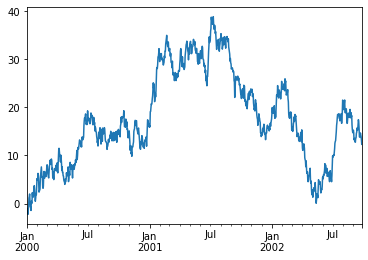

In [79]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

<Figure size 432x288 with 0 Axes>

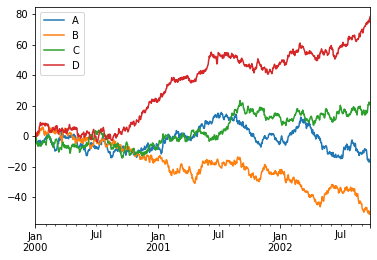

In [80]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df = df.cumsum()

plt.figure();

df.plot();

plt.legend(loc='best');